In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

In [8]:
# load data

users_data = pd.read_pickle("../data/users_data_cleaned_and_encoded.pkl")
users_data.head()

,number_transactions,total_amount_usd,age,housing,loan,duration,campaign,pdays,previous,term_deposit,...,education_primary,education_secondary,education_tertiary,contact_Unknown,contact_cellular,contact_telephone,device_Unknown,device_desktop,device_mobile,device_tablet
0,3.0,2143.0,58,True,False,261,1,-1,0,False,...,0,0,1,1,0,0,0,0,1,0
1,0.0,0.0,44,True,False,151,1,-1,0,False,...,0,1,0,1,0,0,0,1,0,0
2,2.0,2.0,33,True,True,76,1,-1,0,False,...,0,1,0,1,0,0,0,0,1,0
3,0.0,0.0,47,True,False,92,1,-1,0,False,...,0,0,0,1,0,0,0,0,0,1
4,1.0,1.0,33,False,False,198,1,-1,0,False,...,0,0,0,1,0,0,0,0,1,0


In [9]:
users_data.shape

(45179, 37)

In [10]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45179 entries, 0 to 45215
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   number_transactions  45179 non-null  float64
 1   total_amount_usd     45179 non-null  float64
 2   age                  45179 non-null  int64  
 3   housing              45179 non-null  bool   
 4   loan                 45179 non-null  bool   
 5   duration             45179 non-null  int64  
 6   campaign             45179 non-null  int64  
 7   pdays                45179 non-null  int64  
 8   previous             45179 non-null  int64  
 9   term_deposit         45179 non-null  bool   
 10  tenure               45179 non-null  int64  
 11  job_Unknown          45179 non-null  uint8  
 12  job_admin.           45179 non-null  uint8  
 13  job_blue-collar      45179 non-null  uint8  
 14  job_entrepreneur     45179 non-null  uint8  
 15  job_housemaid        45179 non-null 

In [11]:
# define our X and y

target = users_data.total_amount_usd
features = users_data.drop(['total_amount_usd'], axis = 1)

In [5]:
target.shape

(45179,)

In [6]:
target

0        2143.0
1           0.0
2           2.0
3           0.0
4           1.0
          ...  
45211     825.0
45212    1729.0
45213    5715.0
45214       0.0
45215    2971.0
Name: total_amount_usd, Length: 45179, dtype: float64

In [7]:
features.shape

(45179, 36)

In [8]:
# split the data into train and test

X_train, X_test, y_train, y_test = train_test_split(
                                                features, 
                                                target,
                                                test_size = 0.3, 
                                                random_state = 0)

In [9]:
# print the shape of the training data

print("Training Data")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

# question how rows and columns does the training have

Training Data
X_train shape: (31625, 36)
y_train shape: (31625,)


In [10]:
# print the shape of the test data 

print("Test Data")
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

Test Data
X_test shape: (13554, 36)
y_test shape: (13554,)


In [11]:
# scale the data using MinMax or StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

# transform training data
X_train_scaled = scaler.transform(X_train)


In [12]:
X_train_scaled

array([[-0.02478743, -1.11890607,  0.89325054, ...,  1.65996754,
        -1.24606087, -0.3750015 ],
       [-0.02478743, -0.64819899,  0.89325054, ...,  1.65996754,
        -1.24606087, -0.3750015 ],
       [-0.29260512,  0.48149799, -1.11950674, ..., -0.60242142,
         0.80252901, -0.3750015 ],
       ...,
       [-0.8282405 ,  0.01079091,  0.89325054, ..., -0.60242142,
         0.80252901, -0.3750015 ],
       [-0.02478743, -0.36577475, -1.11950674, ..., -0.60242142,
         0.80252901, -0.3750015 ],
       [-0.29260512,  0.10493233,  0.89325054, ..., -0.60242142,
        -1.24606087,  2.66665598]])

In [13]:
# Import the Linear Regression model from sklearn and call it lr

lr = LinearRegression()
lr

LinearRegression()

In [14]:
# Fit the model on the "training data"

lr.fit(X_train_scaled, y_train) 

# OUR MACHINE LEARNING MODEL

LinearRegression()

In [13]:
y_test

6317     1196.0
16336     566.0
15161       0.0
43527    4833.0
13686       3.0
          ...  
35887       0.0
3566        0.0
15660     158.0
15823    2105.0
17226     373.0
Name: total_amount_usd, Length: 13554, dtype: float64

In [15]:
# Evaluate how well the model predicts on unseen data aka "test data"

y_pred = lr.predict(X_test) 
y_pred

array([1.41782789e+15, 1.18532743e+15, 1.38358775e+15, ...,
       9.05582075e+14, 2.94497891e+14, 1.47402445e+15])

In [16]:
print("first five predicted total amounts:", y_pred[0:5])
print("first five actual total amounts:", list(y_test[0:5]))

first five predicted total amounts: [1.41782789e+15 1.18532743e+15 1.38358775e+15 9.66089258e+14
 1.20580706e+15]
first five actual total amounts: [1196.0, 566.0, 0.0, 4833.0, 3.0]


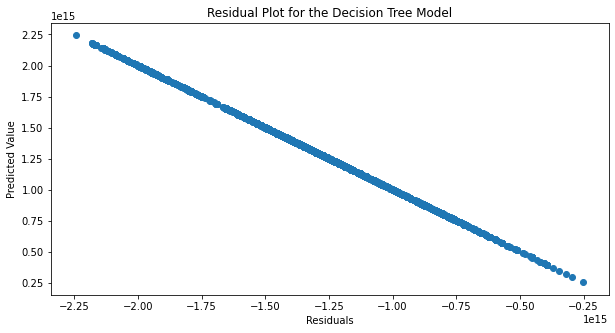

In [17]:
# residual plot

plt.rcParams["figure.figsize"] = (10,5)

residuals = y_test - y_pred

plt.scatter(residuals, y_pred)
plt.title("Residual Plot for the Linear Regression Model")
plt.xlabel("Residuals")
plt.ylabel("Predicted Value")
plt.show();

# we want them the points to be centred around 0

In [18]:
# We will use r2 to evaluating the model performance.

r2_score(y_test, y_pred)

# R^2 (coefficient of determination) regression score function.
# Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). 

# Our r2 sucks. Can we improve this score? Can you try without scaling?
# which assumptions are we violating?

-2.5243529622323794e+23

In [18]:
r2_score(y_test, y_pred)

-2.5243529622324113e+23

In [19]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", round(mse))

Mean Squared Error: 1800227472610620335817469460480
